## Import libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Import data

In [3]:
df0 = pd.read_excel(r'/Patient Segmentation- Cluster Analysis/Dummy Data.xlsx')
df0.head()

,patient_id,claim_id,claim_date,claim_amount,physician_id,diagnosis_code,procedure_code,patient_dob,DOB year,patient_gender,patient_race,Patient country,patient_has_cancer,patient_has_diabetes,Total money spent
0,0057BAF42479AF6A,542412281632605,2009-07-22,50,5.056870e+09,72270,NaN,1942-05-01,1942,Female,White,USA,2,2,16580
1,0057BAF42479AF6A,542842280924481,2009-09-19,50,8.933392e+09,4019,NaN,1942-05-01,1942,Female,White,Germany,2,2,12897
2,0097F42825586D59,542892281178580,2009-06-11,200,3.274116e+08,6108,NaN,1921-07-01,1921,Female,White,France,2,2,13049
3,0097F42825586D59,542042281368648,2009-10-22,60,4.022239e+09,38653,NaN,1921-07-01,1921,Female,White,UK,2,2,14002
4,0097F42825586D59,542292281274912,2010-03-03,10,6.845115e+09,7140,NaN,1921-07-01,1921,Female,White,Italy,2,2,19684


In [4]:
df0['Patient country'].value_counts()

Germany    355
USA        284
Italy      279
UK         263
Spain      245
Canada     241
France     171
Name: Patient country, dtype: int64

## RFM Analysis

In [5]:
import datetime
recent_date = max(df0.claim_date) + datetime.timedelta(days=1) 

    
# Aggregate data by each patient
patients = df0.groupby(['patient_id']).agg({
    'claim_date': lambda x: (recent_date - x.max()).days,
    'claim_id': 'count',
    'Total money spent': 'sum'})
# Rename columns
patients.rename(columns = {'claim_date': 'Recency',
                            'claim_id': 'Frequency',
                            'Total money spent': 'MonetaryValue'}, inplace=True)

In [6]:
patients

,Recency,Frequency,MonetaryValue
patient_id,,,
0057BAF42479AF6A,469,2,29477
0097F42825586D59,304,3,46735
00B666309E7AC0F4,558,1,2781
010F1304121BD9C1,479,1,1315
01181B6BB426AE9F,186,9,59931
...,...,...,...
85E3CDC972326B5C,436,3,18925
861622575BACC07A,227,1,6073
866960908F292822,159,8,67831


C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

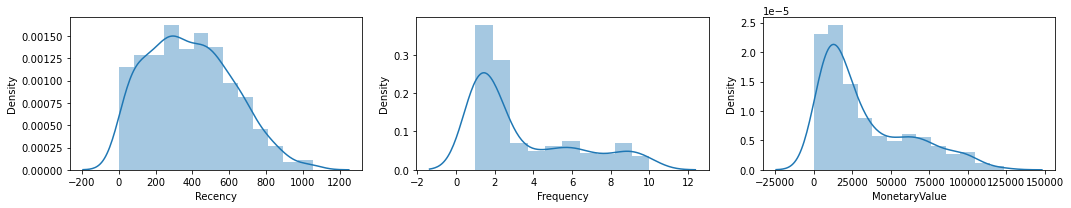

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(patients['Recency'], ax=ax[0])
sns.distplot(patients['Frequency'], ax=ax[1])
sns.distplot(patients['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

In [8]:
from scipy import stats
def patients_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(patients[x], ax=ax[0,0])
    sns.distplot(np.log(patients[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(patients[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(patients[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(patients[x].skew().round(2))
    print(np.log(patients[x]).skew().round(2))
    print(np.sqrt(patients[x]).skew().round(2))
    print(pd.Series(stats.boxcox(patients[x])[0]).skew().round(2))

C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

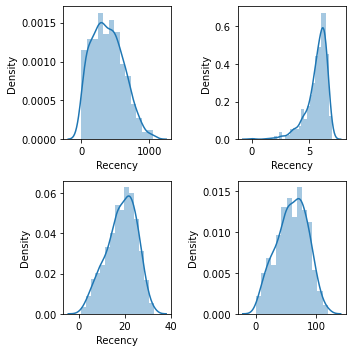

0.36
-1.75
-0.37
-0.17


In [9]:
patients_skewness('Recency')

C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

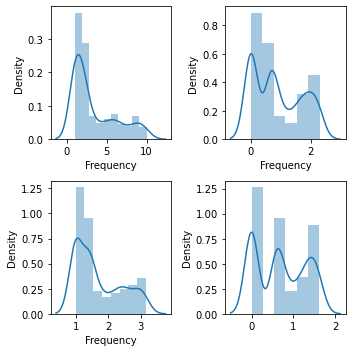

1.05
0.36
0.71
0.13


In [10]:
patients_skewness('Frequency')

C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

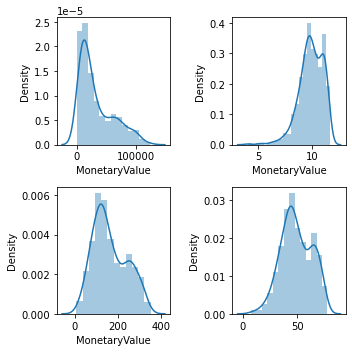

1.06
-0.98
0.42
-0.05


In [11]:
patients_skewness('MonetaryValue')

## Variable transformation for skewness

In [12]:
# Set the Numbers

patients_tf1 = pd.DataFrame()
patients_tf1["Recency"] = stats.boxcox(patients['Recency'])[0]
patients_tf1["Frequency"] = stats.boxcox(patients['Frequency'])[0]
patients_tf1["MonetaryValue"] = stats.boxcox(patients['MonetaryValue'])[0]
patients_tf1.tail()

,Recency,Frequency,MonetaryValue
541,68.284251,0.922971,46.204047
542,45.016714,0.000000,33.365203
543,35.777827,1.508905,65.975902
544,76.168569,0.620225,48.517966
545,93.461554,0.000000,42.584959


## Standardization

In [13]:
scaler = StandardScaler()
scaler.fit(patients_tf1)
patients_normalized = scaler.transform(patients_tf1)
print(patients_normalized.mean(axis = 0).round(2))
print(patients_normalized.std(axis = 0).round(2))

[-0.  0.  0.]
[1. 1. 1.]


In [14]:
pd.DataFrame(patients_normalized).head()

,0,1,2
0,0.459727,-0.121270,0.224952
1,-0.221966,0.393651,0.737310
2,0.788698,-1.176171,-1.619163
3,0.497806,-1.176171,-2.003660
4,-0.802294,1.489812,1.040467


## Clustering

### Choose k- number

C:\Users\Namrata\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


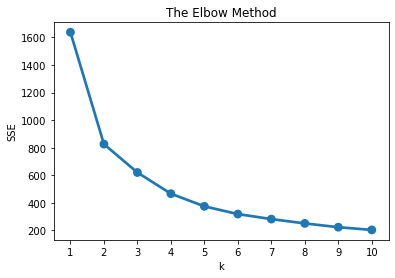

In [15]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=666)
    kmeans.fit(patients_normalized)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [16]:
model = KMeans(n_clusters=3, random_state=666)
model.fit(patients_normalized)
model.labels_.shape

(546,)

In [17]:
patients.shape

(546, 3)

### Analysis

In [18]:
patients['cluster'] = model.labels_
patients.head()

,Recency,Frequency,MonetaryValue,cluster
patient_id,,,,
0057BAF42479AF6A,469,2,29477,2
0097F42825586D59,304,3,46735,1
00B666309E7AC0F4,558,1,2781,2
010F1304121BD9C1,479,1,1315,2
01181B6BB426AE9F,186,9,59931,1


In [19]:
patients.groupby('cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
cluster                                      
0         217.7       1.6       15381.0   167
1         330.9       6.6       64832.5   198
2         599.5       1.4       13542.2   181

### Snake plot to check how clusters differ from each other

In [20]:
df_normalized = pd.DataFrame(patients_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = patients.index
df_normalized['cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,cluster
0,0.459727,-0.121270,0.224952,0057BAF42479AF6A,2
1,-0.221966,0.393651,0.737310,0097F42825586D59,1
2,0.788698,-1.176171,-1.619163,00B666309E7AC0F4,2
3,0.497806,-1.176171,-2.003660,010F1304121BD9C1,2
4,-0.802294,1.489812,1.040467,01181B6BB426AE9F,1


### melt

In [21]:
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,cluster,Attribute,Value
0,0057BAF42479AF6A,2,Recency,0.459727
1,0097F42825586D59,1,Recency,-0.221966
2,00B666309E7AC0F4,2,Recency,0.788698
3,010F1304121BD9C1,2,Recency,0.497806
4,01181B6BB426AE9F,1,Recency,-0.802294


C:\Users\Namrata\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attribute', ylabel='Value'>

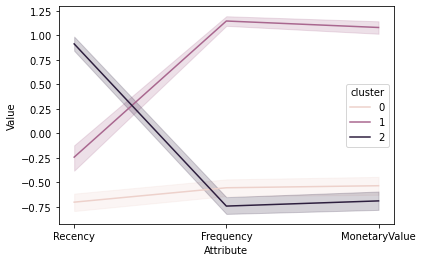

In [22]:
sns.lineplot('Attribute', 'Value', hue='cluster', data=df_nor_melt)

In [23]:
patients.groupby('cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
cluster                                      
0         217.7       1.6       15381.0   167
1         330.9       6.6       64832.5   198
2         599.5       1.4       13542.2   181

In [24]:
cluster_avg = patients.groupby('cluster').mean()
population_avg = patients.mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Frequency,MonetaryValue,Recency,cluster
cluster,,,,
0,-0.514384,-0.529695,-0.434998,NaN
1,0.956408,0.982378,-0.141239,NaN
2,-0.571640,-0.585922,0.555856,NaN


## Inference

#### Cluster 0-  less frequent, less money spent but recently claimed. New patients
#### Cluster 1-  more frequent, more money spent and recently claimed. High value patients 
#### Cluster 2-  less frequent, less money spent and claimed long ago. Low value patients